In [2]:
import pandas as pd

file_path = '/content/data_netflix_bersih_uas.csv'
df = pd.read_csv(file_path)

display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [5]:
for col in ['director', 'cast', 'country']:
    if 'Unknown' in df[col].unique():
        df[col] = df[col].replace('Unknown', 'Not Available')

# Verify the changes by checking a sample of the updated columns
print("Verifying 'director' column unique values after replacement:")
print(df['director'].value_counts().head())
print("\nVerifying 'cast' column unique values after replacement:")
print(df['cast'].value_counts().head())
print("\nVerifying 'country' column unique values after replacement:")
print(df['country'].value_counts().head())

Verifying 'director' column unique values after replacement:
director
Not Available             2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64

Verifying 'cast' column unique values after replacement:
cast
Not Available                                                                              825
David Attenborough                                                                          19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil     14
Samuel West                                                                                 10
Jeff Dunham                                                                                  7
Name: count, dtype: int64

Verifying 'country' column unique values after replacement:
country
United States     2818
India              972
Not Available      831
United Kingdom     419
Japan              245
N

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

print("Data types after conversion and new column creation:")
print(df[['date_added', 'year_added']].info())
print("\nFirst 5 rows of 'date_added' and 'year_added' columns:")
print(df[['date_added', 'year_added']].head())

ValueError: time data "Unknown" doesn't match format "%Y-%m-%d %H:%M:%S", at position 1439. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
df['date_added'] = df['date_added'].replace('Unknown', pd.NaT)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

print("Data types after conversion and new column creation:")
print(df[['date_added', 'year_added']].info())
print("\nFirst 5 rows of 'date_added' and 'year_added' columns:")
print(df[['date_added', 'year_added']].head())

Data types after conversion and new column creation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_added  8709 non-null   datetime64[ns]
 1   year_added  8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.7 KB
None

First 5 rows of 'date_added' and 'year_added' columns:
  date_added  year_added
0 2021-09-25      2021.0
1 2021-09-24      2021.0
2 2021-09-24      2021.0
3 2021-09-24      2021.0
4 2021-09-24      2021.0


In [8]:
content_type_distribution = df['type'].value_counts()
print(content_type_distribution)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


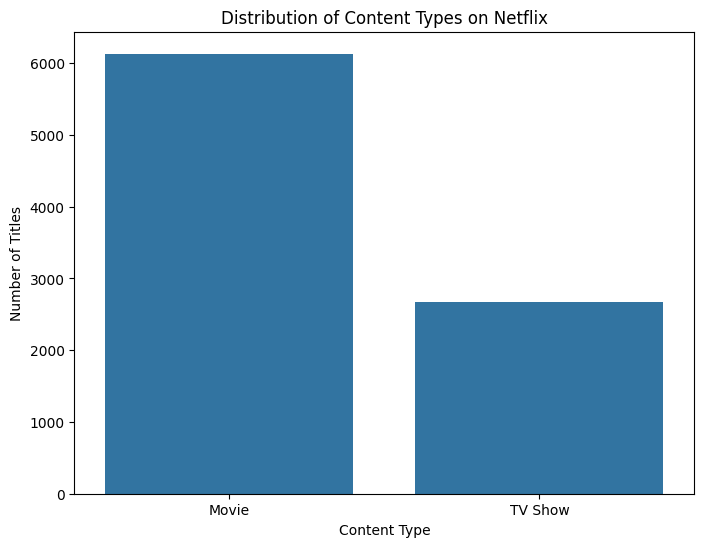

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=content_type_distribution.index, y=content_type_distribution.values)
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

In [10]:
top_directors = df[df['director'] != 'Not Available']['director'].value_counts().head(10)
print(top_directors)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


/tmp/ipython-input-1715709018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')


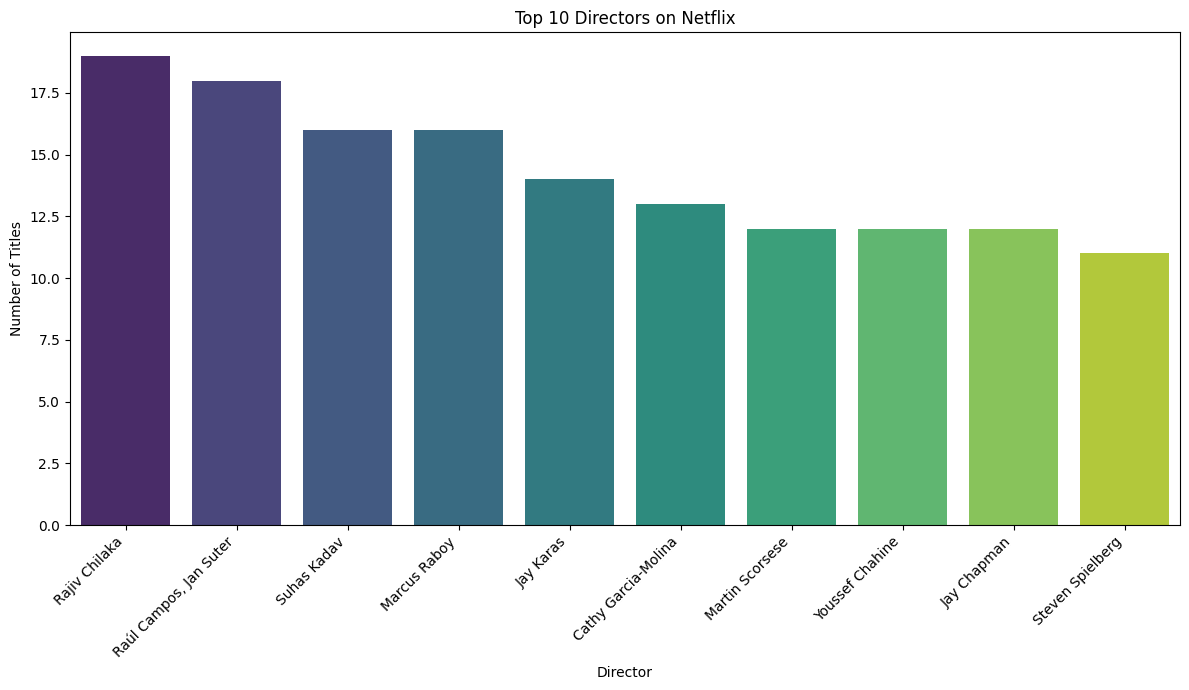

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
top_countries = df[df['country'] != 'Not Available']['country'].value_counts().head(10)
print(top_countries)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


/tmp/ipython-input-1238057532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')


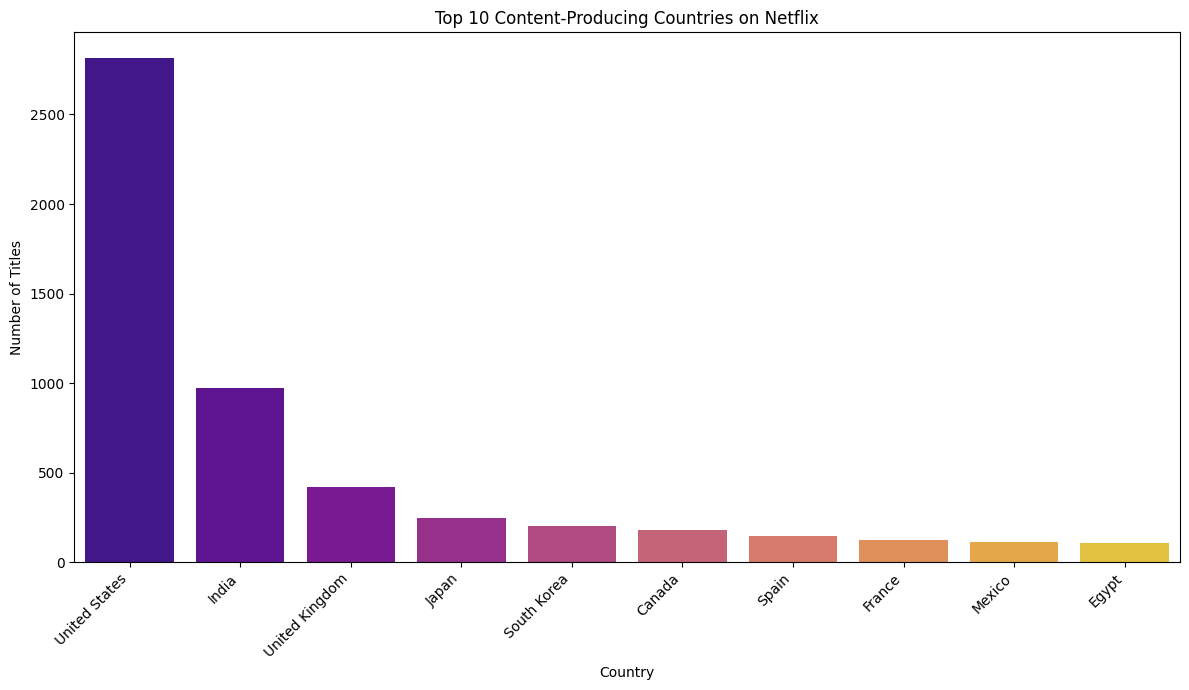

In [13]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

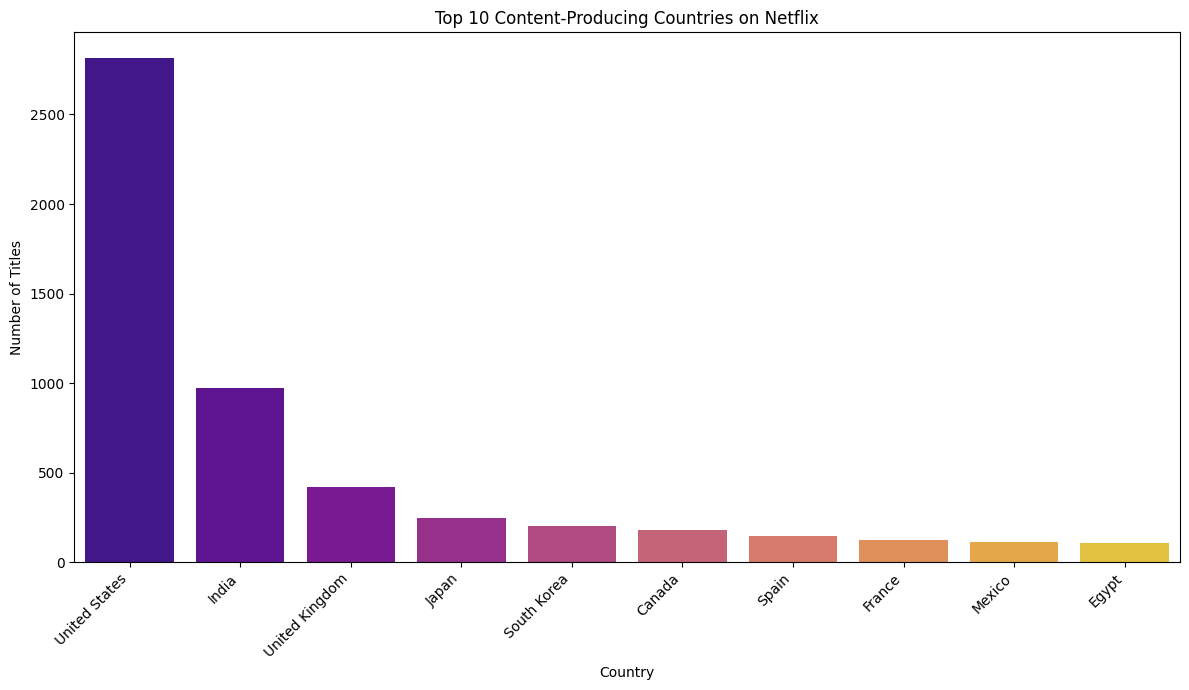

In [14]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='plasma', legend=False)
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
titles_added_per_year = df['year_added'].value_counts().sort_index()
print(titles_added_per_year.head())

year_added
2008.0     2
2009.0     2
2010.0     1
2011.0    13
2012.0     3
Name: count, dtype: int64


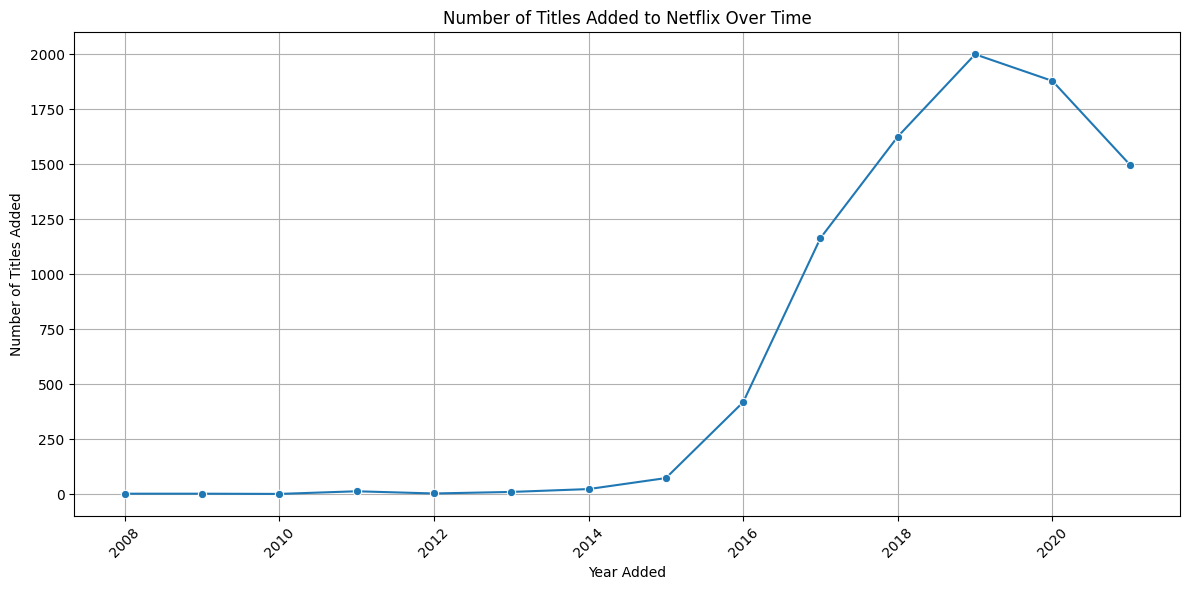

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_added_per_year.index, y=titles_added_per_year.values, marker='o')
plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
titles_released_per_year = df['release_year'].value_counts().sort_index()
print(titles_released_per_year.head())

release_year
1925    1
1942    2
1943    3
1944    3
1945    4
Name: count, dtype: int64


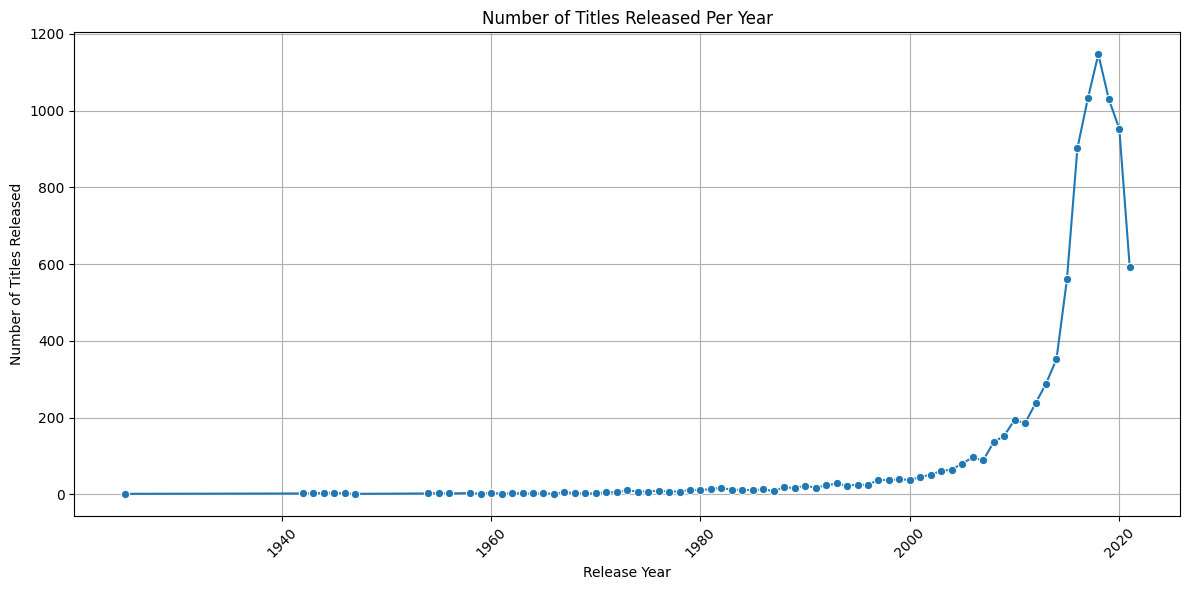

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_released_per_year.index, y=titles_released_per_year.values, marker='o')
plt.title('Number of Titles Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
genres = df['listed_in'].str.split(', ').explode()
print(genres.head())

0             Documentaries
1    International TV Shows
1                 TV Dramas
1              TV Mysteries
2            Crime TV Shows
Name: listed_in, dtype: object


In [20]:
genre_counts = genres.value_counts()
print(genre_counts.head(10))

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


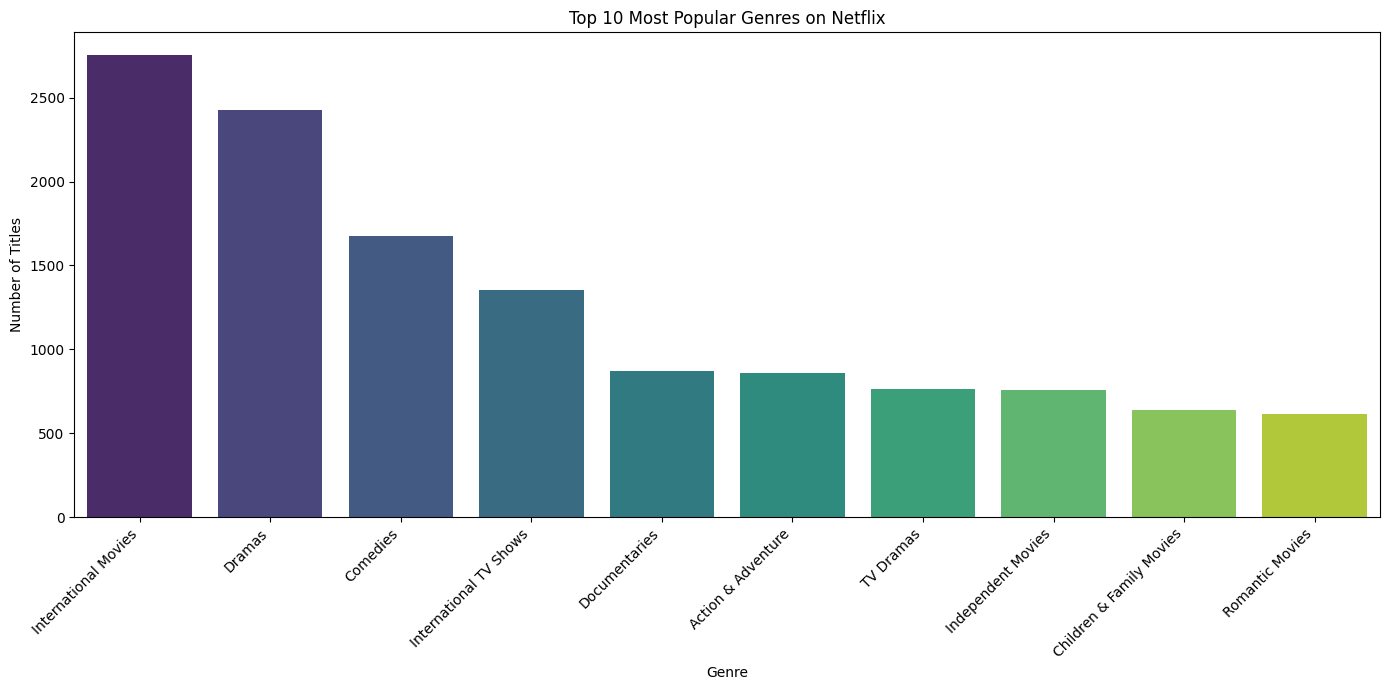

In [21]:
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, hue=genre_counts.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
rating_counts = df['rating'].value_counts()
print(rating_counts.head())

rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


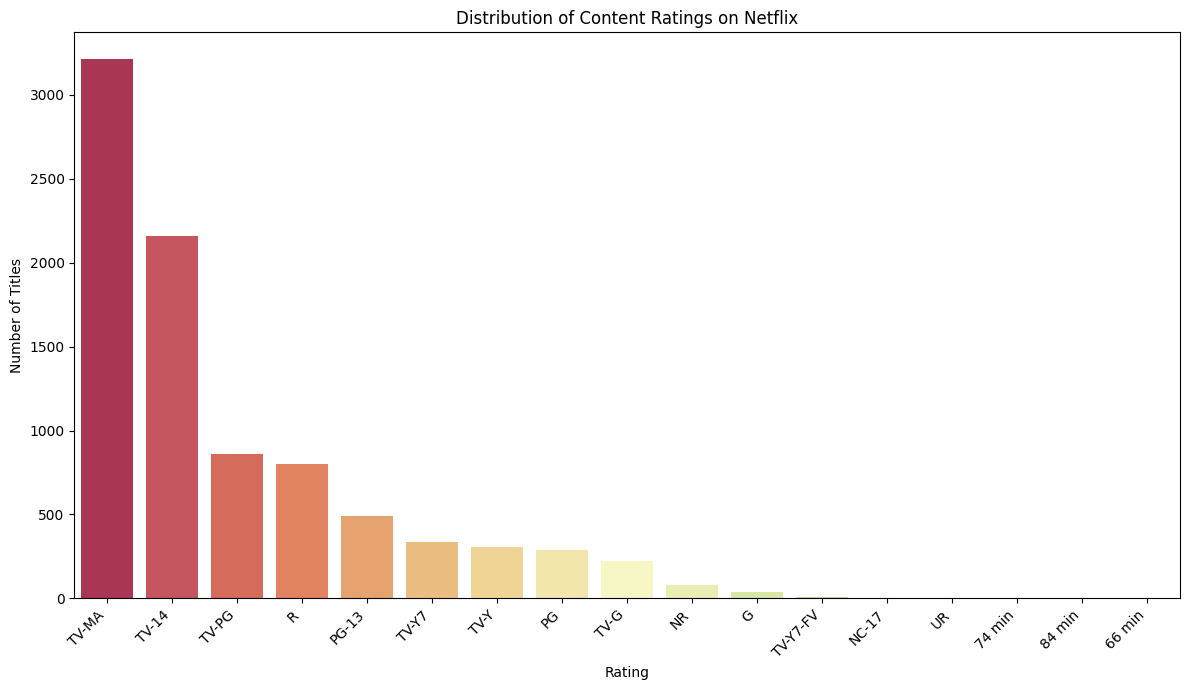

In [23]:
plt.figure(figsize=(12, 7))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='Spectral', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Cleaning and Preparation:** The dataset of 8807 entries was cleaned by replacing "Unknown" values in `director`, `cast`, and `country` columns with "Not Available" (e.g., 2634 directors, 825 cast members, and 831 countries were initially "Unknown"). The `date_added` column was converted to datetime objects, and a new `year_added` column was extracted, with 98 entries originally marked "Unknown" in `date_added` being handled.
*   **Content Type Distribution:** Movies significantly outnumber TV shows, with 6131 'Movie' titles compared to 2676 'TV Show' titles on the platform.
*   **Top Directors:** Rajiv Chilaka is the most prolific director with 19 titles, followed closely by Raúl Campos and Jan Suter with 18 titles each.
*   **Top Content-Producing Countries:** The United States is by far the leading content producer with 2818 titles, followed by India (972 titles) and the United Kingdom (419 titles), indicating a strong Western and South Asian content focus.
*   **Content Addition Trend:** Content additions to Netflix started slowly (e.g., 2 titles in 2008, 2 in 2009) and showed a continuous growth trend over the years, with a notable increase in recent years.
*   **Content Release Trend:** The dataset includes content released as early as 1925, indicating a catalog with historical depth, with a significant increase in release frequency in more recent decades.
*   **Most Popular Genres:** "International Movies" (2752 titles), "Dramas" (2427 titles), and "Comedies" (1674 titles) are the three most popular genres on the platform.
*   **Rating Distribution:** 'TV-MA' is the most prevalent content rating with 3211 titles, followed by 'TV-14' (2160 titles), suggesting a significant portion of Netflix's content is geared towards mature audiences.

### Insights or Next Steps

*   Netflix's content strategy appears to prioritize movies over TV shows and focuses heavily on content from the United States and India, predominantly in the "International Movies," "Dramas," and "Comedies" genres for mature audiences. Further analysis could explore whether this distribution aligns with subscriber demographics and viewing habits.
*   Given the observed growth in content additions over time, analyzing the content acquisition budget or strategies alongside subscriber growth could provide insights into Netflix's expansion tactics and return on investment for different content types or regions.
